In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.use('pgf')
mpl.rcParams.update({
    'text.usetex': True,
    'pgf.texsystem': 'pdflatex',
})

In [3]:
from rsnn.rand import rand_connections_fin, rand_connections_fout

In [4]:
%matplotlib inline

# Events

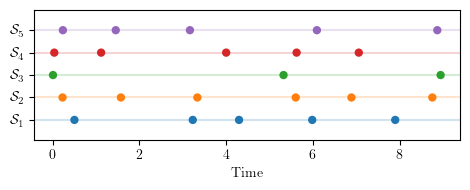

In [184]:
np.random.seed(42)  # For reproducibility

(tmin, tmax) = (0.0, 10.0)
n_neurons = 5
n_f_times = np.random.randint(3, 7, n_neurons)
f_times = [np.sort(np.random.uniform(tmin, tmax - n, n)) + np.arange(n) for n in n_f_times]

fig, ax = plt.subplots(1, 1, figsize=(4.8, 2))

# Original firing times
# ax.set_title(r'$\mathcal{S}$')
ax.set_xlabel('Time')
ax.set_ylim(0.1, n_neurons+1-0.1)
ax.set_yticks(list(range(1, n_neurons + 1)))
ax.set_yticklabels([r'$\mathcal{S}'+fr'_{i}$' for i in range(1, n_neurons + 1)])

for c, f_times_c in enumerate(f_times):
    ax.axhline(c+1, color=f'C{c}', alpha=0.2)
    ax.scatter(
        f_times_c, np.full_like(f_times_c, c+1), facecolors=f'C{c}', edgecolors='none', label=r'$\mathcal{S}' + fr'_{c+1}$'
    )

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6), ncol=2)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
# plt.show()
plt.savefig('events.pdf')

# Receptive Field

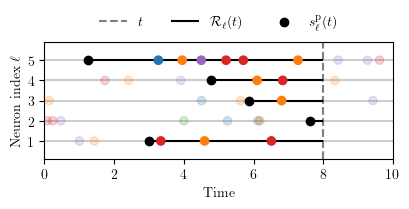

In [185]:
np.random.seed(42)  # For reproducibility

(tmin, t, tmax) = (0.0, 8.0, 10.0)
last_f_times = np.random.uniform(tmin, t, n_neurons)

fig, ax = plt.subplots(1, 1, figsize=(4.2, 2.2))

# Original firing times
ax.set_xlabel('Time')
ax.set_xlim(tmin, tmax)
ax.set_yticks(np.arange(1, n_neurons + 1))
ax.set_ylim(0.1, n_neurons + 1 - 0.1)
ax.set_ylabel(r'Neuron index $\ell$')

ax.axvline(t, color='k', linestyle='--', alpha=0.5, zorder=0, label=r'$t$')
ax.hlines(np.arange(1, n_neurons+1), np.full_like(last_f_times, tmin), last_f_times, color='k', alpha=0.2, zorder=0)
ax.hlines(np.arange(1, n_neurons+1), last_f_times, np.full_like(last_f_times, t), color='k', zorder=0, label=r'$\mathcal{R}_{\ell}(t)$')
ax.hlines(np.arange(1, n_neurons+1), np.full_like(last_f_times, t), np.full_like(last_f_times, tmax), color='k', alpha=0.2, zorder=0)
ax.scatter(last_f_times, np.arange(1, n_neurons+1), c='k', label=r'$s^\mathrm{p}_{\ell}(t)$', zorder=2)
for c in range(n_neurons):
    n_f_times = np.random.randint(3, 10)
    f_intimes = np.random.uniform(tmin, tmax, n_f_times)
    f_inchannels = np.random.randint(0, n_neurons, n_f_times)
    ax.scatter(
        f_intimes,
        np.full_like(f_intimes, c + 1),
        c=[f'C{c}' for c in f_inchannels],
        alpha=0.8 * (f_intimes >= last_f_times[c]) * (f_intimes < t) + 0.2,
        zorder=1
    )
    # ax.axvline(tprev, color='k', alpha=0.5, zorder=0)
    # ax.scatter(tprev, c + 1, c='k')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, frameon=False)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
# plt.show()
plt.savefig('receptive_field.pdf')  # save as PDF created with LaTeX

# Causal Past

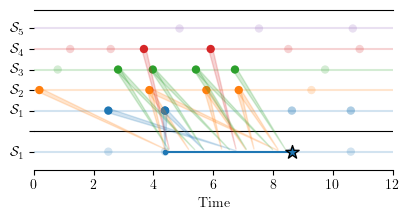

In [203]:
rng = np.random.default_rng(1)  # For reproducibility

# np.random.seed(2)  # For reproducibility

(tmin, tmax) = (0.0, 12.0)
n_neurons = 5
n_f_times = rng.integers(3, 7, n_neurons)
f_times = [np.sort(rng.uniform(tmin, tmax - n, n)) + np.arange(n) for n in n_f_times]

n_in_per_neuron = 10
connections = rand_connections_fin(n_neurons, n_in_per_neuron, 0.5, 5.0, rng)
inputs_to_1 = [(co, p) for (co, p) in connections.items() if co[1] == 0] + [
    ((0, 0), [(0.0, 0.0)])
]

fig, ax = plt.subplots(1, 1, figsize=(4.2, 2.3))

# ax.spines['top'].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines["left"].set_visible(False)
# Original firing times
# ax.set_title(r"$\mathcal{P}(1, s)$")
ax.set_xlabel("Time")
ax.set_yticks([-1] + list(range(1, n_neurons + 1)))
ax.set_yticks(list(range(-1, n_neurons + 1)))
ax.set_yticklabels(
    [
        r"$\mathcal{S}_1$",
        "",
        *[r"$\mathcal{S}" + rf"_{i}$" for i in range(1, n_neurons + 1)],
    ]
)
ax.set_xlim(tmin, tmax)
ax.set_ylim(-1.9, n_neurons + 1 - 0.1)
# ax.set_ylabel(r"Neuron index $\ell$")
# ax.yaxis.set_label_coords(-0.05,0.6)

ax.axhline(0, color="k", linewidth=0.8, zorder=0)
ax.axhline(-1, color="C0", alpha=0.2)
# ax.scatter(f_times[0][2], -1, marker="*", c="C0", label=r"$(\ell, s)$")
ax.scatter(
    f_times[0][2],
    -1,
    # c="C0",
    marker='*',
    s=100,
    facecolors="C0",
    edgecolors="k",
    # linewidth=2,
    label=r"$(\ell, s)$",
    zorder=2
)
ax.scatter(f_times[0][1], -1, marker=".", c="C0")
# ax.vlines(f_times[0][2], 0, -2, colors="k", zorder=0)
ax.hlines(
    -1,
    f_times[0][1],
    f_times[0][2],
    colors="C0",
    zorder=0,
    label=r"$\mathcal{R}_{\ell}(s)$",
)
ax.scatter(
    f_times[0],
    np.full_like(f_times[0], -1),
    alpha=0.2,
    facecolors="C0",
    edgecolors="none",
)
# ax.scatter(
#     f_times[0],
#     np.full_like(f_times[0], -1),
#     alpha=0.2 + 0.8 * (f_times[0] <= f_times[0][2]) * (f_times[0] >= f_times[0][1]),
#     facecolors="C0",
#     edgecolors="none",
# )

for c, f_times_c in enumerate(f_times):
    ax.axhline(c + 1, color=f"C{c}", alpha=0.2)

for co, params in inputs_to_1:
    for t in f_times[co[0]]:
        flag = False
        for d, _ in params:
            if t + d >= f_times[0][1] and t + d < f_times[0][2]:
                flag = True
                ax.annotate(
                    "",
                    xy=(t + d, -1),
                    xytext=(t, co[0] + 1),
                    arrowprops=dict(
                        arrowstyle="wedge", color=f"C{co[0]}", lw=1, alpha=0.2
                    ),
                )
        ax.scatter(
            t,
            co[0] + 1,
            facecolors=f"C{co[0]}",
            edgecolors="none",
            alpha=0.2 + 0.8 * flag,
        )

# ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=3, frameon=False)

fig.tight_layout()
plt.savefig("causal_past.pdf")  # save as PDF created with LaTeX

# Causal Future

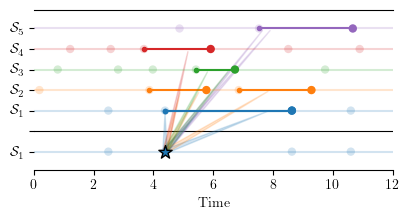

In [202]:
rng = np.random.default_rng(1)  # For reproducibility

# np.random.seed(2)  # For reproducibility

(tmin, tmax) = (0.0, 12.0)
n_neurons = 5
n_f_times = rng.integers(3, 7, n_neurons)
f_times = [
    np.concatenate(
        [
            np.array([-np.inf]),
            np.sort(rng.uniform(tmin, tmax - n, n)) + np.arange(n),
            np.array([np.inf]),
        ]
    )
    for n in n_f_times
]

n_out_per_neuron = 10
connections = rand_connections_fout(n_neurons, n_out_per_neuron, 0.5, 4.0, rng)
outputs_from_1 = [(co, p) for (co, p) in connections.items() if co[0] == 0] + [
    ((0, 0), [(0.0, 0.0)])
]

fig, ax = plt.subplots(1, 1, figsize=(4.2, 2.3))

# ax.spines['top'].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines["left"].set_visible(False)
# Original firing times
# ax.set_title(r"$\mathcal{P}(1, s)$")
ax.set_xlabel("Time")
ax.set_yticks([-1] + list(range(1, n_neurons + 1)))
ax.set_yticks(list(range(-1, n_neurons + 1)))
ax.set_yticklabels(
    [
        r"$\mathcal{S}_1$",
        "",
        *[r"$\mathcal{S}" + rf"_{i}$" for i in range(1, n_neurons + 1)],
    ]
)
ax.set_xlim(tmin, tmax)
ax.set_ylim(-1.9, n_neurons + 1 - 0.1)
# ax.set_ylabel(r"Neuron index $\ell$")
# ax.yaxis.set_label_coords(-0.05,0.6)

ax.axhline(0, color="k", linewidth=0.8, zorder=0)
ax.axhline(-1, color="C0", alpha=0.2)
ax.scatter(
    f_times[0][2],
    -1,
    # c="C0",
    marker='*',
    s=100,
    facecolors="C0",
    edgecolors="k",
    # linewidth=2,
    label=r"$(\ell, s)$",
    zorder=2
)
# ax.vlines(f_times[0][2], 0, -2, colors="k", zorder=0)
ax.scatter(
    f_times[0],
    np.full_like(f_times[0], -1),
    alpha=0.2,
    facecolors="C0",
    edgecolors="none",
)
# ax.scatter(
#     f_times[0][2],
#     -1,
#     facecolors="C0",
#     edgecolors="none",
# )

for c, f_times_c in enumerate(f_times):
    ax.axhline(c + 1, color=f"C{c}", alpha=0.2)
    ax.scatter(
        f_times_c,
        np.full_like(f_times_c, c + 1),
        facecolors=f"C{c}",
        edgecolors="none",
        alpha=0.2,
    )

for co, params in outputs_from_1:
    for prev_t, t in zip(f_times[co[1]][:-1], f_times[co[1]][1:]):
        flag = False
        for d, _ in params:
            if f_times[0][2] + d >= prev_t and f_times[0][2] + d < t:
                flag = True
                ax.annotate(
                    "",
                    xy=(f_times[0][2] + d, co[1] + 1),
                    xytext=(f_times[0][2], -1),
                    arrowprops=dict(
                        arrowstyle="wedge", color=f"C{co[1]}", lw=1, alpha=0.2
                    ),
                    zorder=0
                )
        if flag:
            ax.hlines(
                co[1] + 1,
                prev_t,
                tmax if np.isinf(t) else t,
                colors=f"C{co[1]}",
                zorder=0,
            )
            ax.scatter(
                prev_t,
                co[1] + 1,
                marker=".",
                c=f"C{co[1]}",
            )
            ax.scatter(
                t,
                co[1] + 1,
                edgecolors="none",
                facecolors=f"C{co[1]}",
            )
            # ax.scatter(
            #     t,
            #     co[1] + 1,
            #     facecolors="none",
            #     edgecolors="k",
            #     # linestyle="dotted",
            #     linewidths=2,
            # )

# ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=3, frameon=False)

fig.tight_layout()
plt.savefig("causal_future.pdf")  # save as PDF created with LaTeX

# Jitter Propagation

In [ ]:
M =

# Direct Interaction Window

In [ ]:
np.random.seed(42)  # For reproducibility

(tmin, tmax) = (0.0, 10.0)

n_neurons = 3
# n_f_times = [4, 3, 3]
# f_times = [np.sort(np.random.uniform(tmin, tmax - n, n)) + np.arange(n) for n in n_f_times]
f_times = [np.array([2.3, 6.8, 9.0]), np.array([0.7, 3.4, 5.8]), np.array([0.2, 1.5, 3.0, 7.2])]

n_in_per_neuron = 7
connections = rand_connections_fin(n_neurons, n_in_per_neuron, 0.5, 1.0)
for l in range(n_neurons):
    connections[(l, l)].append((0.0,0.0)) # refratory period

[((0, 1),
  [(0.5402686347263649, 0.0),
   (0.7386066642466496, 0.0),
   (0.5228730091489747, 0.0),
   (0.5982057532561389, 0.0),
   (0.9424700422122856, 0.0)]),
 ((2, 1), [(0.5543842892920947, 0.0)]),
 ((1, 1), [(0.6637424941044142, 0.0), (0.0, 0.0)])]

src: 1, tgt: 0, delay: 0.6351956587054945, f_times[1][2] + delay: 6.435195658705494
src: 1, tgt: 0, delay: 0.7036214977384418, f_times[1][2] + delay: 6.5036214977384414
src: 1, tgt: 1, delay: 0.6637424941044142, f_times[1][2] + delay: 6.463742494104414
src: 1, tgt: 1, delay: 0.0, f_times[1][2] + delay: 5.8
src: 1, tgt: 2, delay: 0.6323037285993318, f_times[1][2] + delay: 6.432303728599331
src: 1, tgt: 2, delay: 0.8901140067131286, f_times[1][2] + delay: 6.690114006713128


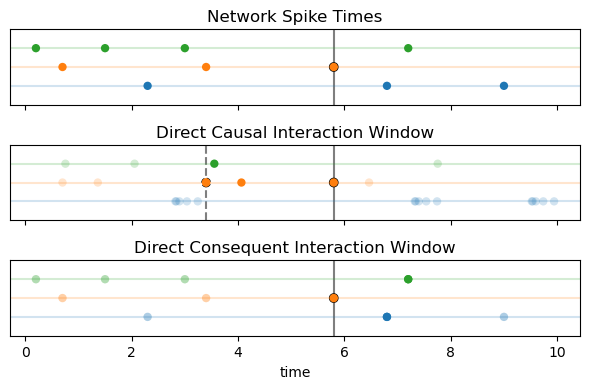

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(6, 4), sharex=True)


# Original firing times
axes[0].set_title('Network Spike Times')
axes[0].set_yticks([])
axes[0].set_ylim(-1, n_neurons)
axes[0].axvline(f_times[1][2], color='k', alpha=0.5, zorder=0)
axes[0].scatter(f_times[1][2], 1, facecolors='none', edgecolors='k')
for c, f_times_c in enumerate(f_times):
    axes[0].axhline(c, color=f'C{c}', alpha=0.2)
    axes[0].scatter(
        f_times_c, np.full_like(f_times_c, c), facecolors=f'C{c}', edgecolors='none'
    )


# Direct causal interaction window
axes[1].set_title('Direct Causal Interaction Window')
axes[1].set_yticks([])
axes[1].set_ylim(-1, n_neurons)
axes[1].axvline(f_times[1][1], color='k', alpha=0.5, linestyle='--', zorder=0)
axes[1].scatter(f_times[1][1], 1, facecolors='none', edgecolors='k', linestyle='--')
axes[1].scatter(f_times[1][1], 1, facecolors='C1', edgecolors='none')
axes[1].axvline(f_times[1][2], color='k', alpha=0.5, zorder=0)
axes[1].scatter(f_times[1][2], 1, facecolors='none', edgecolors='k')
axes[1].scatter(f_times[1][2], 1, facecolors='C1', edgecolors='none')
for c, f_times_c in enumerate(f_times):
    axes[1].axhline(c, color=f'C{c}', alpha=0.2)
for (src, tgt), params in connections.items():
    if tgt == 1:
        for delay, _ in params:
            # print(f'src: {src}, tgt: {tgt}, delay: {delay}, f_times[src] + delay: {f_times[src] + delay}')
            axes[1].scatter(
                f_times[src] + delay,
                np.full_like(f_times[src], src),
                facecolors=f'C{src}',
                edgecolors='none',
                alpha=1.0
                * (
                    (f_times[src] + delay < f_times[1][2])
                    & (f_times[src] + delay >= f_times[1][1])
                )
                + 0.2
                * (
                    (f_times[src] + delay >= f_times[1][2])
                    | (f_times[src] + delay < f_times[1][1])
                ),
            )

# Direct consequent interaction window
axes[2].set_title('Direct Consequent Interaction Window')
axes[2].set_yticks([])
axes[2].set_ylim(-1, n_neurons)
axes[2].axvline(f_times[1][2], color='k', alpha=0.5, zorder=0)
axes[2].scatter(f_times[1][2], 1, facecolors='none', edgecolors='k')
axes[2].scatter(f_times[1][2], 1, facecolors='C1', edgecolors='none')
for c, f_times_c in enumerate(f_times):
    axes[2].axhline(c, color=f'C{c}', alpha=0.2)
for (src, tgt), params in connections.items():
    if src == 1:
        for delay, _ in params:
            print(f'src: {src}, tgt: {tgt}, delay: {delay}, f_times[1][2] + delay: {f_times[1][2] + delay}')
            axes[2].scatter(
                f_times[tgt],
                np.full_like(f_times[tgt], tgt),
                facecolors=f'C{tgt}',
                edgecolors='none',
                alpha=1.0
                * (
                    (f_times[1][2] + delay < f_times[tgt]) & (f_times[1][2] + delay >= np.concatenate([np.array([-np.inf]), f_times[tgt][:-1]]))
                )
                + 0.2
                * (
                    (f_times[1][2] + delay >= f_times[tgt]) | (f_times[1][2] + delay < np.concatenate([np.array([-np.inf]), f_times[tgt][:-1]]))
                ),
            )


# Shared time axis
# axes[2].set_xlim(tmin, tmax)
axes[2].set_xlabel('time')

fig.tight_layout()
plt.show()